# Exploratory Data Analysis

This notebook shows findings on the dataset for the challenge [CommonLit Readability Prize
](https://www.kaggle.com/c/commonlitreadabilityprize/overview) which consists in trying to predict a score on readability based on texts.

In [1]:
train_filepath = 'inputs/train.csv'
test_filepath = 'inputs/test.csv'
sample_submission_filepath = 'inputs/sample_submission.csv'

The training file has 2834 rows and 6 columns: id, url_legal, license, excerpt, target, and standard error.

In [2]:
import pandas as pd

train_data = pd.read_csv(train_filepath)
print(f'Train shape: {train_data.shape}')
print('-------------------------------')
print(train_data.head(5))

Train shape: (2834, 6)
-------------------------------
          id url_legal license  \
0  c12129c31       NaN     NaN   
1  85aa80a4c       NaN     NaN   
2  b69ac6792       NaN     NaN   
3  dd1000b26       NaN     NaN   
4  37c1b32fb       NaN     NaN   

                                             excerpt    target  standard_error  
0  When the young people returned to the ballroom... -0.340259        0.464009  
1  All through dinner time, Mrs. Fayre was somewh... -0.315372        0.480805  
2  As Roger had predicted, the snow departed as q... -0.580118        0.476676  
3  And outside before the palace a great garden w... -1.054013        0.450007  
4  Once upon a time there were Three Bears who li...  0.247197        0.510845  


The test file has only 7 rows and 4 columns: id, url_legal, license and excerpt.

In [3]:
test_data = pd.read_csv(test_filepath)
print(f'Test shape: {test_data.shape}')
print('-------------------------------')
print(test_data.head(5))

Test shape: (7, 4)
-------------------------------
          id                                    url_legal       license  \
0  c0f722661                                          NaN           NaN   
1  f0953f0a5                                          NaN           NaN   
2  0df072751                                          NaN           NaN   
3  04caf4e0c  https://en.wikipedia.org/wiki/Cell_division  CC BY-SA 3.0   
4  0e63f8bea      https://en.wikipedia.org/wiki/Debugging  CC BY-SA 3.0   

                                             excerpt  
0  My hope lay in Jack's promise that he would ke...  
1  Dotty continued to go to Mrs. Gray's every nig...  
2  It was a bright and cheerful scene that greete...  
3  Cell division is the process by which a parent...  
4  Debugging is the process of finding and resolv...  


In [11]:
train_data.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


## Label distribution

Records with low readability tend to have long text with lot of vocabulary that is not frequently used.

In [4]:
subset = train_data.sort_values(by=['target']).head(5)
for item in subset.to_dict('records'):
    print(f'Excerpt: {item["excerpt"]}\n')
    print(f'Target: {item["target"]}')
    print(f'Standard Error: {item["standard_error"]}')
    print('-------------------------')

Excerpt: The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually constitute a single copper ring, m

Records with high readability tend to use simpler vocabulary.

In [5]:
subset = train_data.sort_values(by=['target']).tail(5)
for item in subset.to_dict('records'):
    print(f'Excerpt: {item["excerpt"]}\n')
    print(f'Target: {item["target"]}')
    print(f'Standard Error: {item["standard_error"]}')
    print('-------------------------')

Excerpt: Grandma's garden was wonderful. It was full of sorghum, millet, and cassava. But best of all were the bananas. Although Grandma had many grandchildren, I secretly knew that I was her favorite. She invited me often to her house. She also told me little secrets. But there was one secret she did not share with me. Where she ripened bananas. 
One day I saw a big straw basket placed in the sun outside Grandma's house. When I asked what it was for, the only answer I got was, "It's my magic basket." Next to the basket, there were several banana leaves that Grandma turned from time to time. I was curious. "What are the leaves for, Grandma?" I asked. The only answer I got was, "They are my magic leaves." 
It was so interesting watching Grandma, the bananas, the banana leaves and the big straw basket. But Grandma sent me off to my mother on an errand. "Grandma, please, let me watch as you prepare." "Don't be stubborn, child, do as you are told," she insisted. I took off running. 
When I

The distribution of targets seems like a normal distribution between -3.67 and 1.71

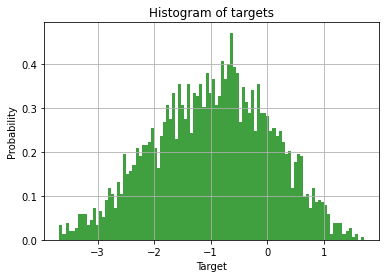

---------------------
Min target value: -3.676267773
Max target value: 1.7113898269999999


In [6]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(train_data['target'], 100, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Target')
plt.ylabel('Probability')
plt.title('Histogram of targets')
plt.grid(True)
plt.show()

print('---------------------')
print(f'Min target value: {min(train_data["target"])}')
print(f'Max target value: {max(train_data["target"])}')

The distribution of the standard error seems to be a skewed distribution from 0.4 to 0.64 with a single outlier in 0.

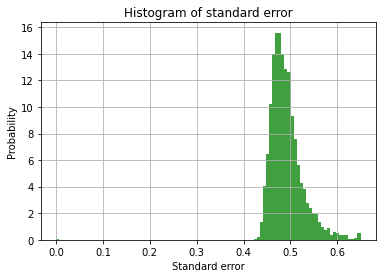

---------------------
Min standard error: 0.0
Max standard error: 0.649671297


In [7]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(train_data['standard_error'], 100, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Standard error')
plt.ylabel('Probability')
plt.title('Histogram of standard error')
plt.grid(True)
plt.show()

print('---------------------')
print(f'Min standard error: {min(train_data["standard_error"])}')
print(f'Max standard error: {max(train_data["standard_error"])}')

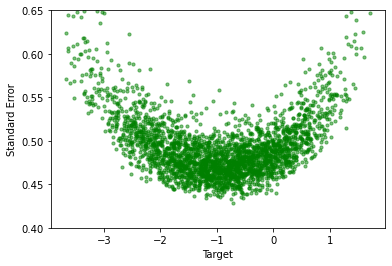

In [8]:
plt.scatter(train_data['target'], train_data['standard_error'], s=10, c="g", alpha=0.5)
plt.xlabel("Target")
plt.ylabel("Standard Error")
plt.ylim(0.4, 0.65)
plt.show()

## Distribution of number of words

Max word count: 299
Min word count: 151
---------------------------------


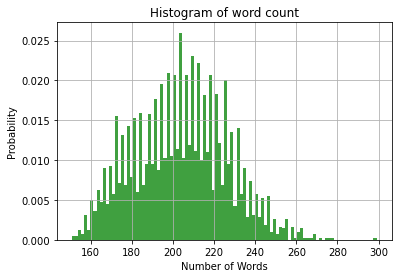

In [10]:
import spacy

nlp = spacy.load("en_core_web_lg")
num_words = []

for item in train_data.to_dict('records'):
    doc = nlp(item["excerpt"])
    num_words.append(len(doc))

import matplotlib.pyplot as plt

n, bins, patches = plt.hist(num_words, 100, density=True, facecolor='g', alpha=0.75)

print(f'Max word count: {max(num_words)}')
print(f'Min word count: {min(num_words)}')
print('---------------------------------')

plt.xlabel('Number of Words')
plt.ylabel('Probability')
plt.title('Histogram of word count')
plt.grid(True)
plt.show()